In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
%matplotlib inline

In [85]:
df = pd.read_csv('data/balance.csv')

In [60]:
df.shape


(400, 12)

In [86]:
df.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


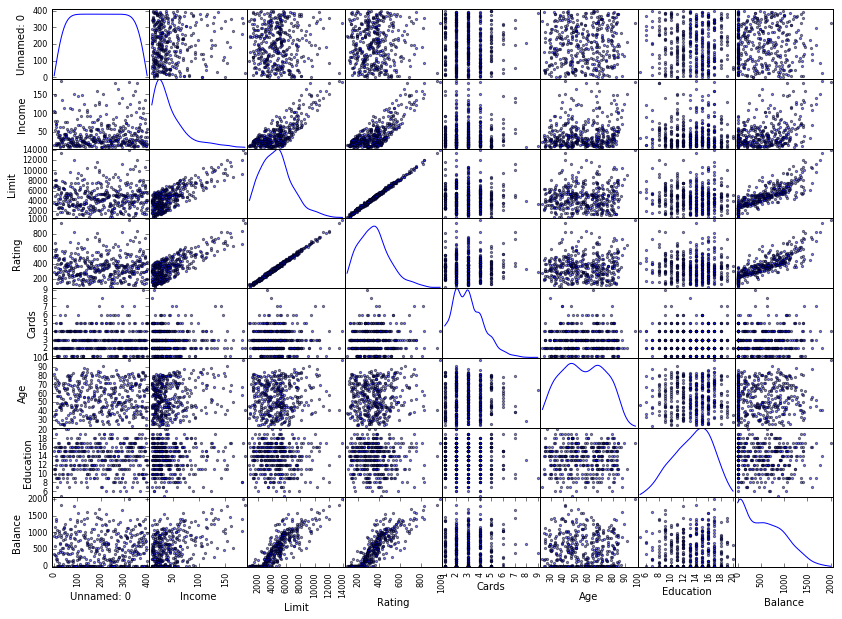

In [35]:
pd.scatter_matrix(df, figsize = (14,10), diagonal = 'kde')
plt.show()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


In [87]:
df['Married'] = df.Married.map({'Yes':1, 'No':0})
df['Gender'] = df.Gender.map({' Male':0, 'Female':1})
df['Student'] = df.Student.map({'No':0, 'Yes':1})

In [18]:
df.Ethnicity.unique()

array(['Caucasian', 'Asian', 'African American'], dtype=object)

In [88]:
dummies = pd.get_dummies(df.Ethnicity)
dummies_noAA = dummies.drop(['African American'], axis=1)

In [89]:
new_df = pd.concat([df, dummies_noAA], axis=1)

In [90]:
new_df.drop(['Ethnicity'], axis=1, inplace=True)

In [91]:
new_df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,0,0,1,333,0.0,1.0
1,2,106.025,6645,483,3,82,15,1,1,1,903,1.0,0.0
2,3,104.593,7075,514,4,71,11,0,0,0,580,1.0,0.0
3,4,148.924,9504,681,3,36,11,1,0,0,964,1.0,0.0
4,5,55.882,4897,357,2,68,16,0,0,1,331,0.0,1.0


In [127]:
cols = new_df.columns.drop(['Unnamed: 0', 'Balance', 'Rating', 'Limit', 'Married', 
                            'Asian', 'Caucasian', 'Education', 'Gender'])
y = np.asarray(new_df['Balance'])
x = new_df[cols]
x = sm.add_constant(x)
model_bal = sm.OLS(y, x).fit()
summary = model_bal.summary()
print summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     41.06
Date:                Tue, 24 May 2016   Prob (F-statistic):           8.87e-29
Time:                        15:07:10   Log-Likelihood:                -2949.8
No. Observations:                 400   AIC:                             5910.
Df Residuals:                     395   BIC:                             5930.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        214.0498     78.530      2.726      0.0

In [128]:
x.corr()

,const,Income,Cards,Age,Student
const,NaN,NaN,NaN,NaN,NaN
Income,NaN,1.000000,-0.018273,0.175338,0.019632
Cards,NaN,-0.018273,1.000000,0.042948,-0.026164
Age,NaN,0.175338,0.042948,1.000000,-0.029844
Student,NaN,0.019632,-0.026164,-0.029844,1.000000


In [129]:
y_pred = model_bal.predict(x)
student_resid = model_bal.outlier_test()['student_resid']

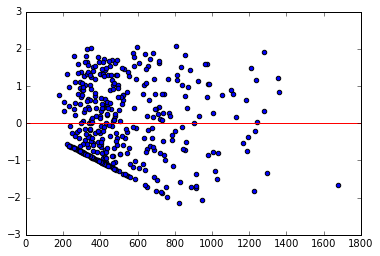

In [130]:
plt.scatter(y_pred,student_resid )
plt.axhline(0,0,1800, color='r')

In [131]:
sm.stats.diagnostic.het_goldfeldquandt(y,x)
#hetGoldfeldQuandt(y,x)

(0.92897156538135806, 0.69627107952089173, 'increasing')

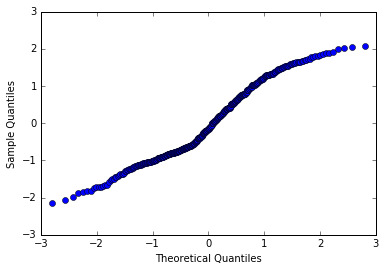

In [132]:
sm.qqplot(student_resid)
plt.show()

In [147]:
new_df['Balance_conditional'] = new_df.Balance.map(lambda x: 1 if x > 0 else 0)
new_df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian,Balance_conditional
0,1,14.891,3606,283,2,34,11,0,0,1,333,0.0,1.0,1
1,2,106.025,6645,483,3,82,15,1,1,1,903,1.0,0.0,1
2,3,104.593,7075,514,4,71,11,0,0,0,580,1.0,0.0,1
3,4,148.924,9504,681,3,36,11,1,0,0,964,1.0,0.0,1
4,5,55.882,4897,357,2,68,16,0,0,1,331,0.0,1.0,1


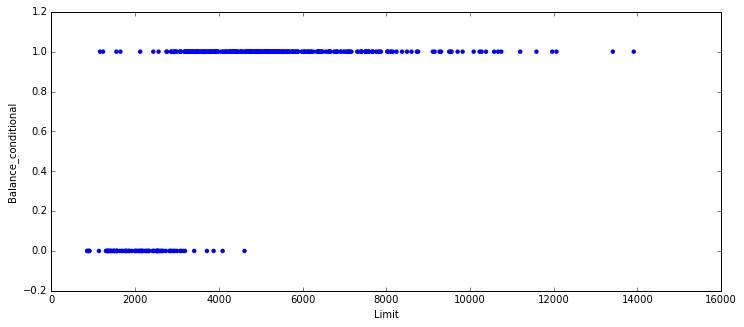

In [152]:
new_df.plot(kind='scatter', y='Balance_conditional', x='Limit', edgecolor='none', figsize=(12,5))
plt.show()

In [153]:
df_bal = new_df[new_df.Balance > 0]

In [155]:
cols = df_bal.columns.drop(['Unnamed: 0', 'Balance'])
y = np.asarray(df_bal['Balance'])
x = df_bal[cols]
x = sm.add_constant(x)
model_bal = sm.OLS(y, x).fit()
summary = model_bal.summary()
print summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.366e+04
Date:                Tue, 24 May 2016   Prob (F-statistic):               0.00
Time:                        15:34:46   Log-Likelihood:                -1162.5
No. Observations:                 310   AIC:                             2349.
Df Residuals:                     298   BIC:                             2394.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Income                 -9.9916    

In [156]:
df_bal.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Asian,Caucasian,Balance_conditional
Unnamed: 0,1.000000,0.031405,0.023499,0.019379,-0.013693,0.073178,0.015446,-0.085951,-0.056714,0.016677,-0.018341,-0.057065,0.090208,NaN
Income,0.031405,1.000000,0.833706,0.830651,-0.040318,0.227115,-0.032540,-0.021187,-0.018829,0.035209,0.414373,-0.000537,-0.043412,NaN
Limit,0.023499,0.833706,1.000000,0.996091,-0.022540,0.164160,-0.031583,-0.037479,-0.128538,0.027618,0.795757,0.007660,-0.034412,NaN
Rating,0.019379,0.830651,0.996091,1.000000,0.024991,0.167269,-0.040466,-0.035413,-0.122168,0.034104,0.798441,0.005503,-0.031207,NaN
Cards,-0.013693,-0.040318,-0.022540,0.024991,1.000000,0.020615,-0.087351,-0.011200,-0.026456,-0.001775,0.074416,0.017205,0.002309,NaN
Age,0.073178,0.227115,0.164160,0.167269,0.020615,1.000000,0.023899,0.010058,-0.023400,-0.022040,0.008343,-0.020925,-0.032730,NaN
Education,0.015446,-0.032540,-0.031583,-0.040466,-0.087351,0.023899,1.000000,-0.010611,0.077099,0.083458,0.001001,0.076741,-0.032785,NaN
Gender,-0.085951,-0.021187,-0.037479,-0.035413,-0.011200,0.010058,-0.010611,1.000000,0.063201,0.010738,-0.017192,0.039627,0.011681,NaN
Student,-0.056714,-0.018829,-0.128538,-0.122168,-0.026456,-0.023400,0.077099,0.063201,1.000000,-0.103269,0.209602,0.084205,-0.075446,NaN
Married,0.016677,0.035209,0.027618,0.034104,-0.001775,-0.022040,0.083458,0.010738,-0.103269,1.000000,-0.031086,0.080538,0.041756,NaN


(1.3560947280177233, 0.034790720956657334, 'increasing')


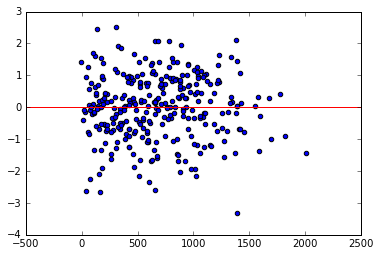

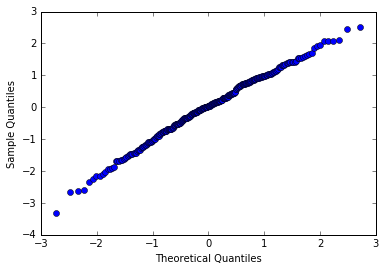

In [159]:
y_pred = model_bal.predict(x)
student_resid = model_bal.outlier_test()['student_resid']

print sm.stats.diagnostic.het_goldfeldquandt(y,x)

plt.scatter(y_pred,student_resid )
plt.axhline(0,0,1800, color='r')
plt.show()

sm.qqplot(student_resid)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     73.43
Date:                Tue, 24 May 2016   Prob (F-statistic):           9.77e-66
Time:                        15:38:53   Log-Likelihood:                -1185.9
No. Observations:                 209   AIC:                             2398.
Df Residuals:                     196   BIC:                             2441.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
const                -224.9324    

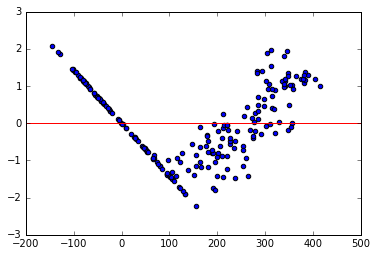

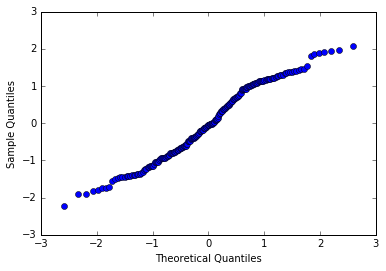

In [161]:
df_0bal = new_df[new_df.Balance < 500]

cols = df_0bal.columns.drop(['Unnamed: 0', 'Balance'])
y = np.asarray(df_0bal['Balance'])
x = df_0bal[cols]
x = sm.add_constant(x)
model_bal = sm.OLS(y, x).fit()
summary = model_bal.summary()
print summary

y_pred = model_bal.predict(x)
student_resid = model_bal.outlier_test()['student_resid']

print sm.stats.diagnostic.het_goldfeldquandt(y,x)

plt.scatter(y_pred,student_resid )
plt.axhline(0,0,1800, color='r')
plt.show()

sm.qqplot(student_resid)
plt.show()

bad!

In [163]:
cols = ['Income']
y = np.asarray(new_df['Balance'])
x = new_df[cols]
x = sm.add_constant(x)
model_bal_inc = sm.OLS(y, x).fit()
summary = model_bal_inc.summary()
print summary

# y_pred = model_bal.predict(x)
# student_resid = model_bal.outlier_test()['student_resid']

# print sm.stats.diagnostic.het_goldfeldquandt(y,x)

# plt.scatter(y_pred,student_resid )
# plt.axhline(0,0,1800, color='r')
# plt.show()

# sm.qqplot(student_resid)
# plt.show()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 24 May 2016   Prob (F-statistic):           1.03e-22
Time:                        15:43:01   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        246.5148     33.199      7.425      0.0

In [164]:
cols = ['Income', 'Student']
y = np.asarray(new_df['Balance'])
x = new_df[cols]
x = sm.add_constant(x)
model_bal_inc_st = sm.OLS(y, x).fit()
summary = model_bal_inc_st.summary()
print summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     76.22
Date:                Tue, 24 May 2016   Prob (F-statistic):           9.64e-29
Time:                        15:43:41   Log-Likelihood:                -2954.4
No. Observations:                 400   AIC:                             5915.
Df Residuals:                     397   BIC:                             5927.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        211.1430     32.457      6.505      0.0

In [195]:
df_bal = new_df[new_df.Balance > 450]
df_bal['Income_Student'] = df_bal['Income']*df_bal['Student']
cols = ['Income', 'Student','Income_Student' ]
y = np.asarray(df_bal['Balance'])
x = df_bal[cols]
x = sm.add_constant(x)
model_bal = sm.OLS(y, x).fit()
summary = model_bal.summary()
print summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     26.79
Date:                Tue, 24 May 2016   Prob (F-statistic):           1.34e-14
Time:                        16:10:41   Log-Likelihood:                -1421.4
No. Observations:                 203   AIC:                             2851.
Df Residuals:                     199   BIC:                             2864.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
const            658.4542     34.085     19.

/Users/gstudent/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


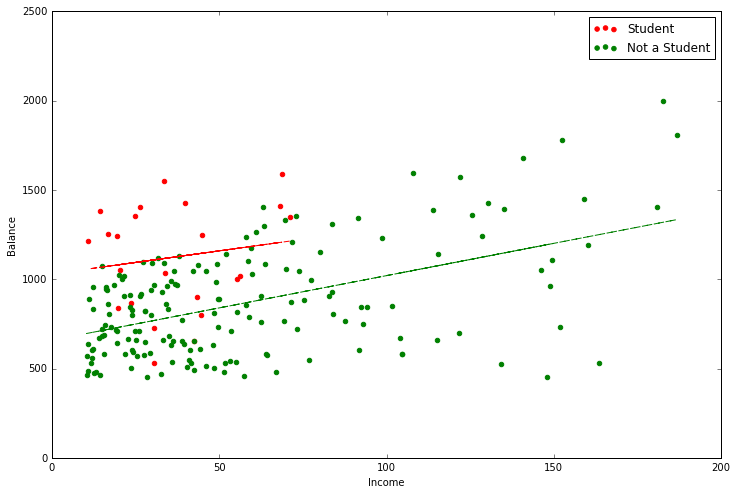

In [200]:
student = df_bal[(df_bal.Student == 1) & (df_bal.Income < 100)]
no_student = df_bal[df_bal.Student == 0]

fig = plt.figure(figsize=(12,8))
z1 = np.polyfit(student.Income, student.Balance, 1)
p1 = np.poly1d(z1)

z2 = np.polyfit(no_student.Income, no_student.Balance, 1)
p2 = np.poly1d(z2)

plt.plot(student.Income, p1(student.Income), "r--", lw=1)
plt.plot(no_student.Income, p2(no_student.Income), "g--", lw=1)

plt.scatter(student.Income, student.Balance,label='Student', color='r')
plt.scatter( no_student.Income, no_student.Balance,label='Not a Student', color='g')
plt.xlabel('Income')
plt.ylabel('Balance')
plt.legend()
plt.show()